In [1]:
#adapted from two articles on Medium
import time
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
style.use('ggplot')

**We download the data for Apple stock prices for the entire year of 2017 with the intent of projecting the option contract price on January 1, 2020 which expires in one year. The year, time range, and stock are all adjustable.**

In [3]:
start = dt.datetime(2017, 1, 1)
end = dt.datetime(2017, 12, 31)

**The variable 'returns' is the daily percentage change from one day to the next over the time period from 'start' to 'end'.**

In [4]:
#can replace AAPL with GOOG, AMZN, FB, etc.
prices = web.DataReader('AAPL', 'yahoo', start, end)['Close']
returns = prices.pct_change()

**'last_price' is the final price of 2017, which we will use as the starting point for each individual random walk.**

In [5]:
#set the starting price as the most recent price
last_price = prices[-1]

**We run the monte carlo for ten thousand simulations, simulating for 252 trading days, the number of trading days in 2018. For the purposes of the simulation, we arbitrarily set the strike price at 40, but we can change it. It has a big effect on the final prices, as this is the price at which you exercise the option at expiration.**

In [6]:
#Number of Simulations
num_simulations = 10000
num_days = 252
#strike price
strike_price = 40

In [7]:
total_sim = pd.DataFrame()

**The volatility, 'daily_vol' is calculated by taking the standard deviation of the previously calculated daily percentage change. Ten thousand one-year long random walk price simulations are run. Each individual random walk step, equivalent to a day, is chosen by choosing a random number from a normal distribution centered at zero with standard deviation of the volatility. This number is added to one, which is then multiplied by the previous days' price.**

In [8]:
simulation_df = pd.DataFrame()

daily_vol = returns.std()

for x in range(num_simulations):
    count = 0
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series

**This dataframe showsd the results of the entire simulation. Moving to your right you get each of the 10000 individual random walks. Moving down, you get the price every day of the year for each respective random walk.**

In [9]:
simulation_df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,41.810237,42.591121,42.552697,42.407255,41.995077,41.809679,42.179096,41.951458,43.368526,41.918442,...,41.425438,42.004294,42.898414,41.880115,42.733675,43.300206,42.662032,42.216859,41.550679,42.267752
1,42.332365,41.883494,41.530353,42.670367,41.667879,41.887216,41.891615,42.147667,44.084783,42.292328,...,41.150283,42.581404,42.520444,42.639283,42.224686,43.955984,42.891506,42.227151,41.524113,42.184180
2,40.926868,42.124851,40.947752,42.309575,41.822184,42.028789,41.981335,42.603340,44.235408,42.106314,...,40.807703,42.364881,43.841311,42.084020,43.166727,44.344398,42.458369,41.417788,41.762385,41.147597
3,40.767499,42.224497,40.520463,42.263113,41.446638,42.549329,42.638797,42.770329,44.231809,42.070337,...,41.511017,43.281404,43.920261,42.604925,43.257784,44.841745,42.660604,41.275256,41.437098,41.076832
4,42.194020,41.746803,40.389189,41.893114,41.212779,42.622371,42.638475,42.602256,43.582614,41.799408,...,40.701647,42.785747,43.775198,42.723495,43.525678,45.794079,42.987073,41.696101,40.607745,40.748817
5,41.988703,41.755014,41.019384,41.858167,40.884768,42.921623,42.525999,42.371135,44.103048,42.249052,...,40.746953,42.852109,44.530533,42.007066,43.727729,45.548368,43.618732,41.748493,40.266177,39.790045
6,41.939587,41.334683,40.576847,41.449641,40.445433,42.092420,43.095350,42.344967,44.291412,42.297875,...,40.858060,43.708319,43.901899,42.384320,43.859291,44.987144,43.182055,41.950883,39.690583,40.130221
7,41.680602,41.372490,41.076349,41.543242,40.371379,41.894627,43.313584,42.334818,44.613341,42.245787,...,40.313757,43.538360,44.748661,42.366173,43.558675,44.227934,43.093232,41.757490,39.614783,39.860405
8,42.705238,42.365763,41.319968,41.199067,40.713324,41.321479,43.807445,42.092995,45.370269,41.853996,...,40.438019,43.025171,44.850803,42.138881,43.998388,44.226220,43.241408,41.913527,39.009816,39.484579
9,42.974481,42.213353,41.789057,40.958922,39.794539,41.046287,44.181134,42.590542,44.524915,41.458206,...,40.411111,43.032494,45.292589,42.616446,43.620055,44.004151,43.335379,42.636342,39.552123,38.932311


**We now display the price cone. This shows all ten thousand random walk simulations we have run on one plot. The red line is the starting price, which is the price from the last day of 2017.**

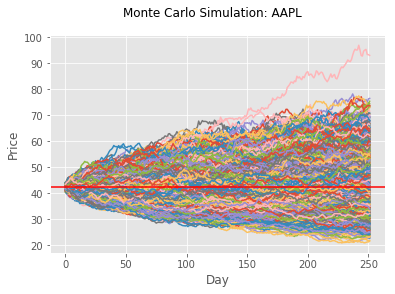

In [10]:
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation: AAPL')
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

**Here is the histogram for just the final price from every year-long random walk.**

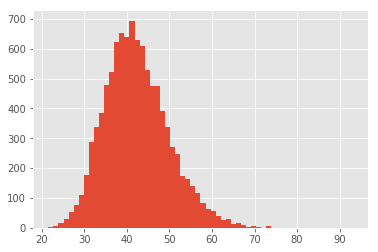

In [11]:
final_prices = simulation_df.T[num_days - 1]
plt.hist(final_prices, 60)
plt.show()

**Now, for the final step, we calculate the difference between the final price and the strike price, and the difference between the strike price and the final price, for calls and puts, respectively. If the difference is negative, we change it to zero, as in these cases, one would not exercise the option contract, as it results in a loss. Once we have calculated the difference for each price and nullified the negative values, we average all of these values out, zeros and all, and this is the price of the contract. This reflects that the price of the contract should be a 'fair bet' that you will profit by expiration.**

In [12]:
diff = final_prices - strike_price
for i in range(num_simulations - 1):
    if diff[i] < 0:
        diff[i] = 0

In [13]:
#price of a call option
call = np.mean(diff)
call

4.193694473851818

In [14]:
diff2 = strike_price - final_prices
for i in range(num_simulations - 1):
    if diff2[i] < 0:
        diff2[i] = 0

In [15]:
#price of a put option
put = np.mean(diff2)
put

1.891084700683808

**We now take the prior calculated volatility, daily_vol, and multiply it by the square root of 365 and then 100 to convert to the yearly voltility so we can compare the monte carlo-calculated prices to the Black-Scholes calculated prices, as they should agree.**

In [16]:
daily_vol*np.sqrt(365)*100

21.314627361650874

**For this volatility and for one year length, the Black-Scholes calculator website, http://option-price.com/index.php, tells us the price for the Call Option should be 4.201, and for the Put Option should be 1.894. Our results are very close to the accepted theoretical model. It should be noted that our calculated price does vary somewhat as 10000 steps is not enough to converge entirely.**